### 목표 : 당뇨병 예측 모델 구현
- 2024/02/27 과제
- 데이터 : [scikit-learn](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset)
- 학습방법 : 지도학습 + 예측 => KNN Regression (Y값이 연속형이라서)

[Attribute Information]
* age age in years
* sex
* bmi body mass index
* bp average blood pressure
* s1 tc, total serum cholesterol
* s2 ldl, low-density lipoproteins
* s3 hdl, high-density lipoproteins
* s4 tch, total cholesterol / HDL
* s5 ltg, possibly log of serum triglycerides level
* s6 glu, blood sugar level


(1) 모듈 로딩 및 데이터 준비

In [4]:
import pandas as pd
from sklearn.datasets import load_diabetes

In [5]:
# featureDF, targetSR = load_diabetes(return_X_y=True, as_frame=True) # DataFrame으로 저장

In [6]:
# diabetes = load_diabetes()
# featureArray = diabetes['data']
# targetArray = diabetes['target']
# feature_names = diabetes['feature_names']

In [7]:
dbtDF = pd.read_csv("https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt", sep="\t")
dbtDF

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


In [8]:
dbtDF.corr()[['Y']]     # 'S5', 'BMI', 'BP', 'S4' 등이 결과값 'Y'와 상관관계가 높음

,Y
AGE,0.187889
SEX,0.043062
BMI,0.586450
BP,0.441482
S1,0.212022
S2,0.174054
S3,-0.394789
S4,0.430453
S5,0.565883
S6,0.382483


(2) 데이터 준비
- 이상치, 중복치 제거

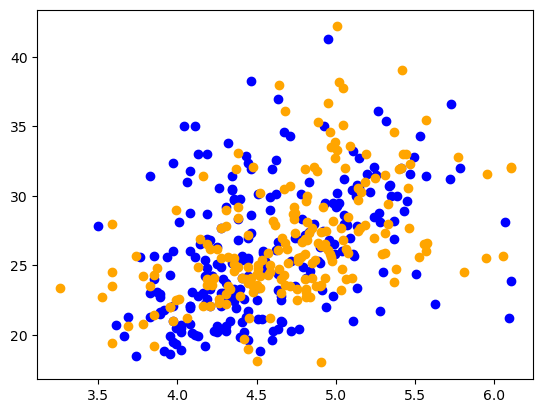

In [9]:
import matplotlib.pyplot as plt

gen_condition = dbtDF['SEX'] == 1
plt.scatter(dbtDF['S5'][dbtDF['SEX'] == 1], dbtDF['BMI'][dbtDF['SEX'] == 1], c='blue')
plt.scatter(dbtDF['S5'][dbtDF['SEX'] == 2], dbtDF['BMI'][dbtDF['SEX'] == 2], c='orange')
plt.show()

(3-1) 피쳐와 타겟 분리

In [10]:
cols = ['S5', 'BMI']
featureDF = dbtDF[cols]
featureDF.head(3)

,S5,BMI
0,4.8598,32.1
1,3.8918,21.6
2,4.6728,30.5


In [11]:
targetSR = dbtDF['Y']
targetSR.head(3)

0    151
1     75
2    141
Name: Y, dtype: int64

(3-2) 학습/테스트 데이터셋 분리 (7:3)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(featureDF, targetSR, test_size=0.3, random_state=10)

In [14]:
x_train.shape, y_train.shape

((309, 2), (309,))

In [15]:
x_test.shape, y_test.shape

((133, 2), (133,))

(3-3) 피쳐 데이터의 스케일링

In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = StandardScaler()   # 스케일러 객체 생성

In [17]:
scaler.fit(x_train)         # 데이터에 대한 학습 평균, 표준편차 계산 진행

StandardScaler()

In [18]:
# 뒤에 _가 붙어있는 속성들은 학습이 끝난 뒤에만 확인할 수 있다.
# 모델 파라미터 -> 모델 학습이 끝난 후 확인 가능
scaler.mean_    # 학습에 사용하는 피쳐가 2개라서 평균도 2개

array([ 4.67127994, 26.43462783])

In [19]:
# 학습용 피쳐 스케일링
scaled_x_train = scaler.transform(x_train)
scaled_x_train.shape

(309, 2)

In [20]:
# 테스트용 피쳐 스케일링
scaled_x_test = scaler.transform(x_test)
scaled_x_test.shape

(133, 2)

(3-4) 데이터 시각화

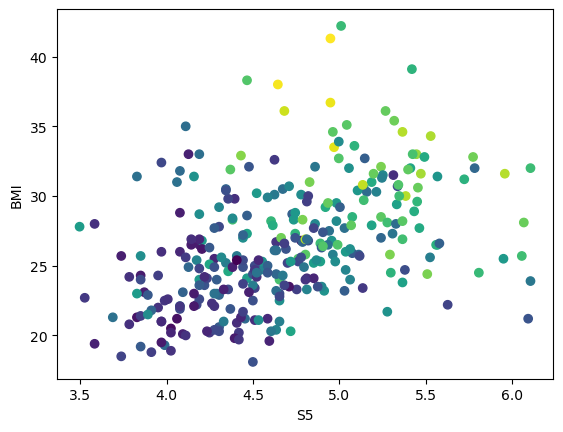

In [21]:
plt.scatter(x_train.iloc[:,0], x_train.iloc[:,1], c=y_train)
plt.xlabel(x_train.columns[0])
plt.ylabel(x_train.columns[1])
plt.show()

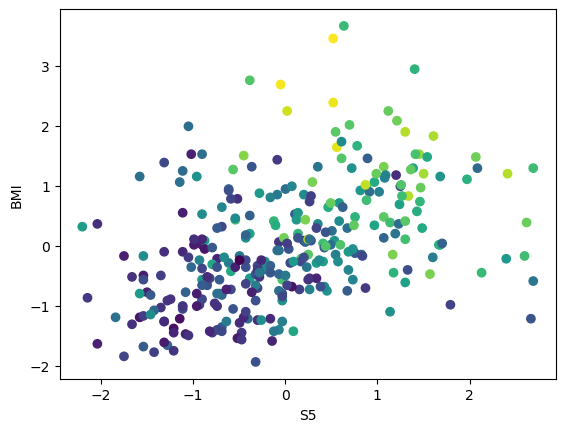

In [22]:
plt.scatter(scaled_x_train[:,0], scaled_x_train[:,1], c=y_train)
plt.xlabel(x_train.columns[0])
plt.ylabel(x_train.columns[1])
plt.show()

(4) 학습 진행

In [23]:
from sklearn.neighbors import KNeighborsRegressor

In [24]:
train_scoreList = []
test_scoreList = []

for k in range(1, 20):
    dbtModel = KNeighborsRegressor(n_neighbors=k)
    dbtModel.fit(scaled_x_train, y_train)
    train_scoreList.append(dbtModel.score(scaled_x_train, y_train))
    test_scoreList.append(dbtModel.score(scaled_x_test, y_test))

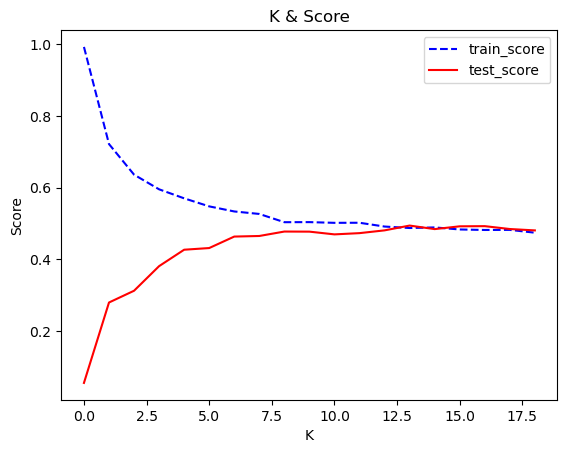

In [25]:
train_scoreList# K 개수에 따른 학습용/테스트용 점수 시각화
plt.plot(train_scoreList, 'b--', label='train_score')
plt.plot(test_scoreList, 'r-', label='test_score')
plt.title('K & Score')
plt.xlabel('K')
plt.ylabel('Score')
plt.legend()
plt.show()

In [26]:
test_scoreList.index(max(test_scoreList))

13

In [27]:
train_scoreList[13], max(test_scoreList)

(0.4870889034955588, 0.49390704703349886)

(5) 테스트 진행

(6) 성능평가

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [32]:
y_pred = dbtModel.predict(scaled_x_test)

In [34]:
# 결정계수 값
r2_score(y_test, y_pred)

0.4804472643340735

In [36]:
# 평균제곱오차
mean_squared_error(y_test, y_pred)

3287.558827817466

In [38]:
# 평균절대값오차
mean_absolute_error(y_test, y_pred)

46.19074000791452

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.neighbors import KNeighborsRegressor

def knn_reg_scores_by_test_size(featureDF, targetSR, test_size, random_state=10):
    x_train, x_test, y_train, y_test = train_test_split(featureDF, targetSR, test_size=0.3, random_state=random_state)
    scaler = StandardScaler()   # 스케일러 객체 생성
    scaler.fit(x_train)
    scaled_x_train = scaler.transform(x_train)
    scaled_x_test = scaler.transform(x_test)
    
    train_scoreList = []
    test_scoreList = []

    for k in range(1, 20):
        dbtModel = KNeighborsRegressor(n_neighbors=k)
        dbtModel.fit(scaled_x_train, y_train)
        train_scoreList.append(dbtModel.score(scaled_x_train, y_train))
        test_scoreList.append(dbtModel.score(scaled_x_test, y_test))
    
    test_max_score = max(test_scoreList)
    train_max_score = train_scoreList[test_scoreList.index(test_max_score)]

    if test_max_score >= 0.53:   # test score가 0.53 넘을 때만 출력...
        print(f'[피쳐, test_size, random_state] : [{list(featureDF.columns)}, {test_size}, {random_state}]')
        print(f'[train, test] : [{train_max_score}, {test_max_score}]')

In [ ]:
for rstate in range(1, 100):
    for col2 in ['BMI', 'BP', 'S4']:
        for tsize in [0.3, 0.25, 0.2]:
            knn_reg_scores_by_test_size(dbtDF[['S5', col2]], dbtDF['Y'], tsize, rstate)

[피쳐, test_size, random_state] : [['S5', 'BMI'], 0.3, 31]
[train, test] : [0.45062383057509936, 0.5322807141883182]
[피쳐, test_size, random_state] : [['S5', 'BMI'], 0.25, 31]
[train, test] : [0.45062383057509936, 0.5322807141883182]
[피쳐, test_size, random_state] : [['S5', 'BMI'], 0.2, 31]
[train, test] : [0.45062383057509936, 0.5322807141883182]


[결론]  
test_score : 0.5322807141883182
- 피쳐 : ['S5', 'BMI']
- test_size : 0.3
- random_state : 31